In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('loan_data.csv')


print(df.info())
print(df.describe())
print(df.isnull().sum())


df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna('0', inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

C:\Users\user\AppData\Local\Temp\ipykernel_13752\4028393805.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13752\4028393805.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

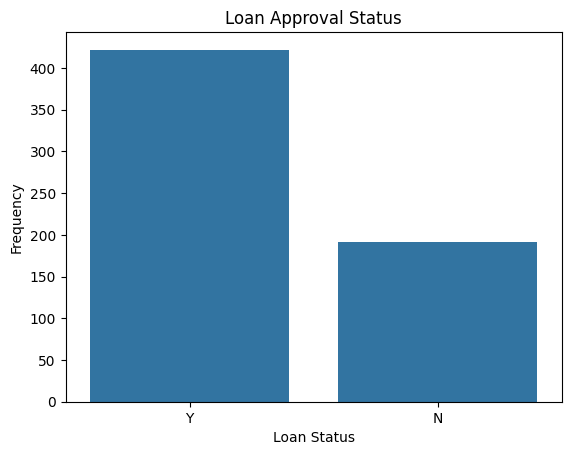

In [29]:
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.show()

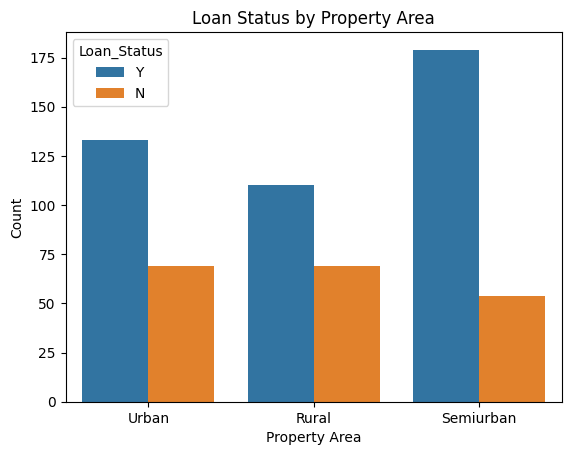

In [30]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Loan Status by Property Area')
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.show()

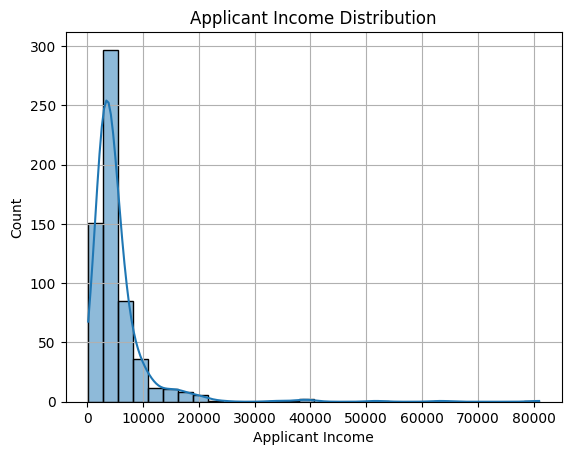

In [34]:
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title('Applicant Income Distribution')
plt.xlabel("Applicant Income")
plt.ylabel("Count")
plt.grid(True)
plt.show()

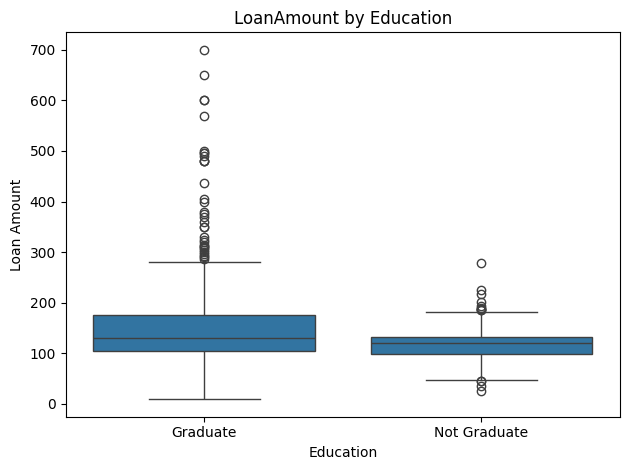

In [35]:
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('LoanAmount by Education')
plt.tight_layout()
plt.xlabel("Education")
plt.ylabel("Loan Amount")
plt.show()

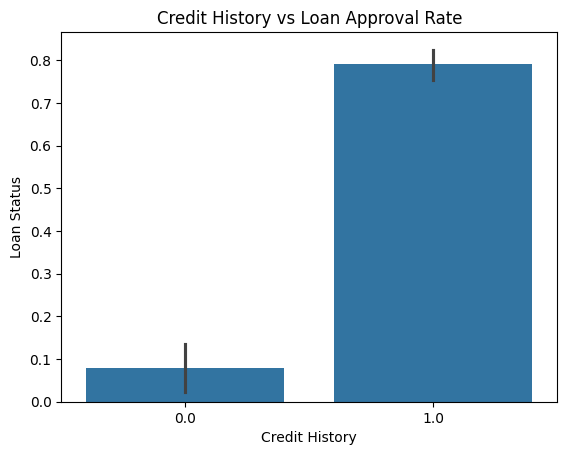

In [36]:
sns.barplot(x='Credit_History', y=df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0), data=df)
plt.title('Credit History vs Loan Approval Rate')
plt.xlabel("Credit History")
plt.ylabel("Loan Status")
plt.show()

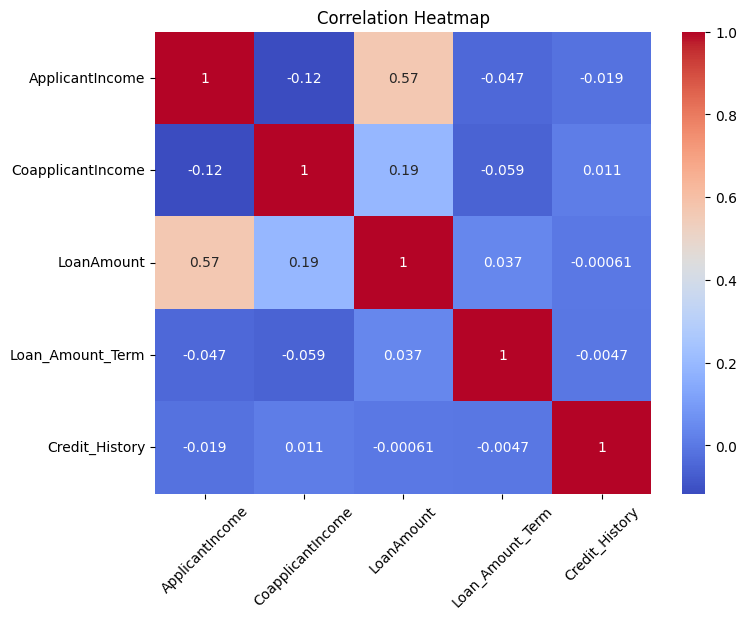

In [27]:
plt.figure(figsize=(8,6))
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
data = df[cols]
sns.heatmap(data.corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()